In [2]:
from pandas._libs.tslibs.timestamps import Timestamp
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor, ExternalFactor
from timeseries_generator import Generator, HolidayFactor, RandomFeatureFactor, SinusoidalFactor, WeekdayFactor, WhiteNoise
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
start_date = Timestamp("01-01-2019")
end_date = Timestamp("01-01-2025")

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='date'>)

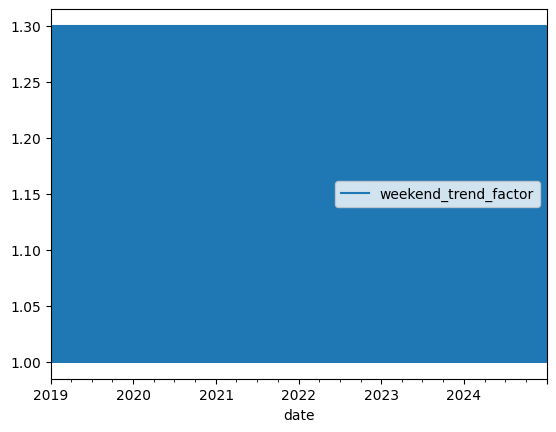

In [15]:
weekday= WeekdayFactor()
weekday.plot(start_date, end_date)

,series,country,base_amount,series_3_factor,series_seasonal_trend_factor,series_1_factor,holiday_trend_factor,weekend_trend_factor,white_noise,total_factor,value
date,,,,,,,,,,,
2019-01-01,s_3,Romania,100,2.0,0.604529,1.0,1.500000,1.00,0.922150,1.672399,167.239875
2019-01-01,s_2,Romania,100,1.0,0.703397,1.0,1.500000,1.00,1.003821,1.059127,105.912705
2019-01-01,s_1,Romania,100,1.0,0.802264,0.5,1.500000,1.00,0.971612,0.584617,58.461728
2019-01-02,s_3,Romania,100,2.0,0.603554,1.0,1.500000,1.00,0.957681,1.734038,173.403784
2019-01-02,s_2,Romania,100,1.0,0.702666,1.0,1.500000,1.00,1.051426,1.108202,110.820212
2019-01-02,s_1,Romania,100,1.0,0.801777,0.5,1.500000,1.00,1.004394,0.603975,60.397539
2019-01-03,s_3,Romania,100,2.0,0.602697,1.0,1.447218,1.00,1.058247,1.846078,184.607844
2019-01-03,s_2,Romania,100,1.0,0.702023,1.0,1.447218,1.00,1.074252,1.091419,109.141883
2019-01-03,s_1,Romania,100,1.0,0.801349,0.5,1.447218,1.00,1.103609,0.639942,63.994217


C:\Users\Matty\AppData\Local\Temp\ipykernel_29508\315372623.py:69: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  plot_df[plot_df["series"] == "s_1"][


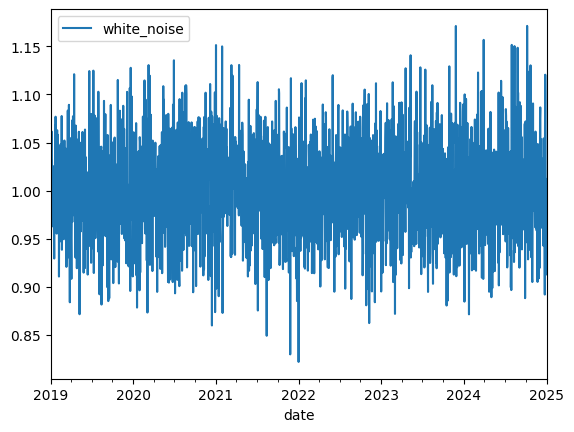

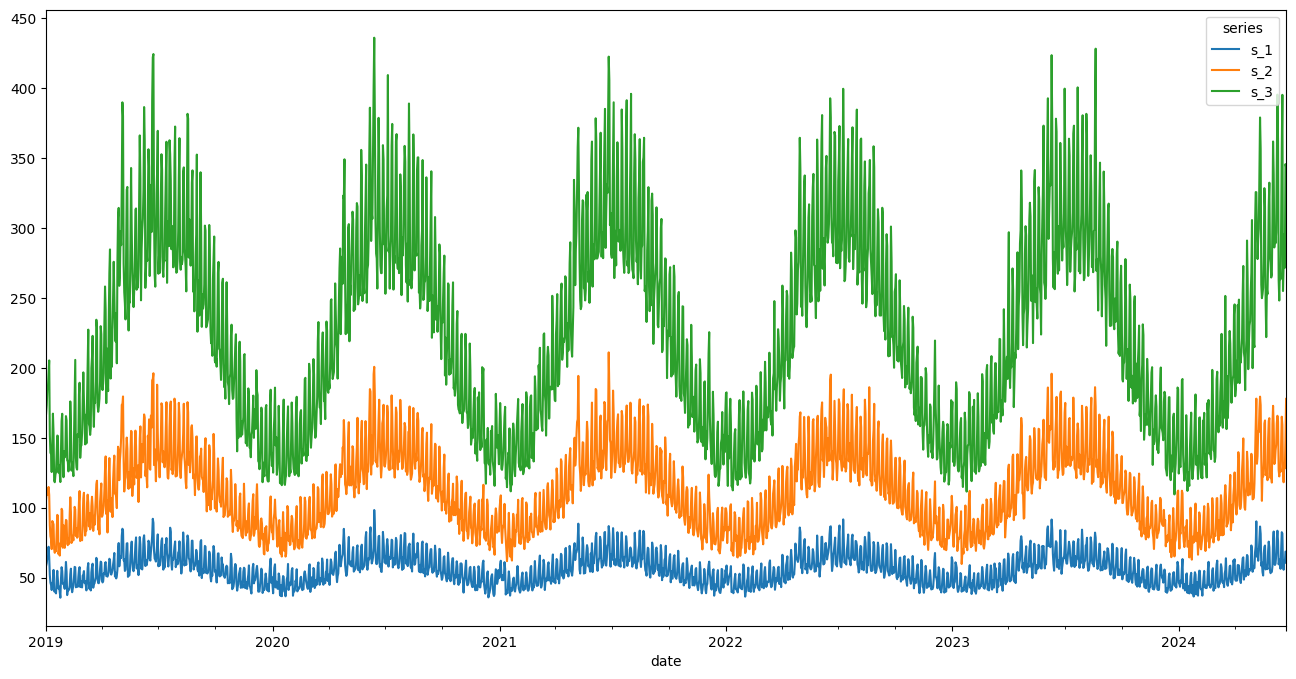

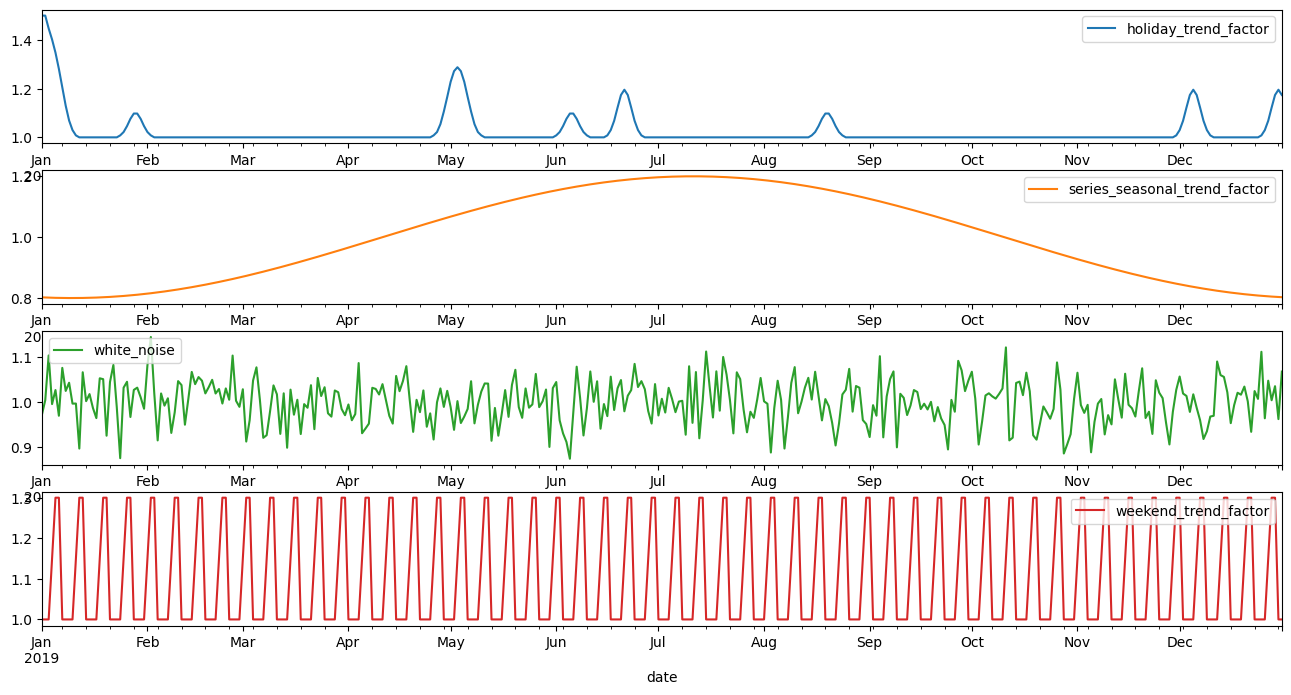

In [23]:


holiday_factor = HolidayFactor(holiday_factor=1.5)
# special_holiday_factors={
#     "Christmas Day": 10.
# }
# )
# holiday_factor.plot(start_date=start_date, end_date=end_date)

series_seasonal_components = SinusoidalFactor(
    feature="series",
    col_name="series_seasonal_trend_factor",
    feature_values={
        "s_1": {"wavelength": 365, "amplitude": 0.2, "phase": 265, "mean": 1.0},
        "s_2": {"wavelength": 365, "amplitude": 0.3, "phase": 265, "mean": 1.0},
        "s_3": {"wavelength": 365, "amplitude": 0.4, "phase": 265, "mean": 1.0},
    },
)

features_dict = {"series": ["s_3", "s_2", "s_1"], "country": ["Romania"]}

series_3 = RandomFeatureFactor(
    feature_values=["s_3"],
    feature="series",
    min_factor_value=2,
    max_factor_value=2,
    col_name="series_3_factor",
)

series_1 = RandomFeatureFactor(
    feature_values=["s_1"],
    feature="series",
    min_factor_value=0.5,
    max_factor_value=0.5,
    col_name="series_1_factor",
)

# series.plot(start_date=start_date, end_date=end_date)
white_noise = WhiteNoise(stdev_factor=0.05)
white_noise.plot(start_date=start_date, end_date=end_date)

g: Generator = Generator(
    factors={
        holiday_factor,
        series_1,
        series_3,
        series_seasonal_components,
        white_noise,
        weekday
    },
    features=features_dict,
    date_range=pd.date_range(start=start_date, end=end_date),
    base_value=100,
)

df = g.generate()
plot_df = df.set_index("date")
display(plot_df.head(10))
plot_df[["value", "series"]].pivot(columns=["series"], values="value").head(2000).plot(
    figsize=(16, 8)
)

# add day of year,
df["day_of_year"] = df["date"].dt.dayofyear


# Side by side plot of the components(left) vs the series (right) without synchronization of axis
plot_df = df.set_index("date")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
# Left plot with subplots
plot_df[plot_df["series"] == "s_1"][
    ["holiday_trend_factor", "series_seasonal_trend_factor", "white_noise", "weekend_trend_factor"]
].head(365).plot(ax=ax1, subplots=True)
# Right plot without subplots
# plot_df[plot_df["series"] == "s_1"][["value"]].head(365).plot(ax=ax2, subplots=True)
plt.show()


df.drop(
    ["country", "base_amount", "series_3_factor", "series_1_factor"], axis=1
).to_csv("data/non_linear_time_series.csv", index=True, index_label="date")